# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Imports](#3.2_Imports)
  * [3.3 Load The Data](#3.3_Load_The_Data)
  * [3.4 Explore The Data](#3.4_Explore_The_Data)
      * [3.4.1 Total Tracks Per Category](#3.4.1_Total_tracks_per_category) 
          * [3.4.1.1 Total Tracks Per Genre](#3.4.1.1_Total_tracks_per_genre)
          * [3.4.1.2 Total Tracks Per Decade](#3.4.1.2_Total_tracks_per_decade)
          * [3.4.1.3 Total Tracks Per Artist](#3.4.1.3_Total_tracks_per_artist)
      * [3.4.2 Total Tracks Per Genre and Decade](#3.4.2_Total_tracks_per_genre_and_decade) 
      * [3.4.3 Averages by Genre](#3.4.3_Averages_by_genre) 
          * [3.4.3.1 Average Dancibility by Genre](#3.4.3.1_Average_danceability_by_genre)
          * [3.4.3.2 Average Energy by Genre](#3.4.3.2_Average_energy_by_genre)
          * [3.4.3.3 Average Loudness by Genre](#3.4.3.3_Average_loudness_by_genre)
          * [3.4.3.4 Average Speechiness by Genre](#3.4.3.4_Average_speechiness_by_genre)
      * [3.4.4 Feature Engineering](#3.4.4_Feature_Engineering)
        * [3.4.4.1 Data Set Review for Feature Engineering](#3.4.4.1_Data_Set_Review_for_Feature_engineering)
        * [3.4.4.2 Feature correlation heatmap](#3.4.4.2_Feature_correlation_heatmap)
        * [3.4.4.3 Scatterplots of numeric features against genre](#3.4.4.3_Scatterplots_of_numeric_features_against_genre)
  * [3.5 Summary](#3.5_Summary)


## 3.2 Imports<a id='3.2_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 3.3 Load The Data<a id='3.3_Load_The_Data'></a>

In [2]:
spotify_data = pd.read_csv('../data/genre_music.csv')
spotify_data.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b


## 3.4 Explore The Data<a id='3.4_Explore_The_Data'></a>

The focus of this project is to build classification models and evaluate their performance for the estimation of the probability that a song belongs to a genre (among the ones considered), as a function of properties of these songs. The project will also study the importance and impact of these song properties with respect to the models built.

As the focus will be on genre classification, it will be help to better understand the properties of the data sample as it relates to genre and other features.

### 3.4.1 Total Tracks Per Category<a id='3.4.1_Total_tracks_per_category'></a>

How many tracks do we have per genre?  Will there be some genres that have more data available than others to test with?  If so, it will be helpful to identify if there are certain features that can help us to separate small genre categories from the larger genre categories.

   #### 3.4.1.1 Total Tracks Per Genre <a id='3.4.1.1_Total_tracks_per_genre'></a>

In [3]:
spotify_data_newind = spotify_data.set_index('track')

In [4]:
spotify_data_newind['genre'].value_counts()

pop      16460
r&b      11040
rock      6850
latin     2870
rap       2364
edm       1515
Name: genre, dtype: int64

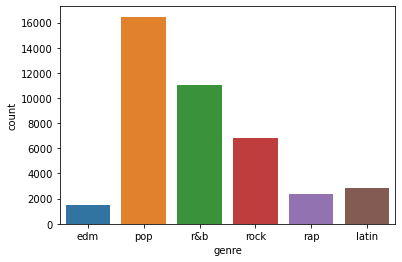

In [5]:
ax = sns.countplot(x="genre", data=spotify_data_newind)

The genre with the most tracks included is pop by a significant margin followed by R&B and rock.  It would be interesting to see how these genres are split over time as definitions of genres or popularity of genres change over time.

   #### 3.4.1.2 Total Tracks Per Decade<a id='3.4.1.2_Total_tracks_per_decade'></a>

In [6]:
spotify_data_newind['decade'].value_counts()

60s    8642
70s    7764
80s    6907
10s    6396
00s    5871
90s    5519
Name: decade, dtype: int64

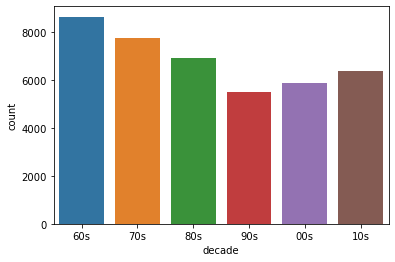

In [7]:
bx = sns.countplot(x="decade", data=spotify_data_newind)

The population overall is more heavily weighted to earlier time periods (60's and 70's) with the smallest population being the 90's.  While the decade populations increase in 00's and 10's, the increase isn't as dramatic as the prior variances.

   #### 3.4.1.3 Total Tracks Per Artist<a id='3.4.1.3_Total_tracks_per_artist'></a>

Are there large groupings of artists that might be helpful for categorization?  If there are a large amount (more than 100) of artists with only a few tracks, then we should set the artist category aside and focus on other features for future analytical considerartion.

In [8]:
spotify_data_newind['artist'].value_counts()

Traditional                               207
Harry Belafonte                           140
P. Susheela                               130
Ennio Morricone                           128
Jerry Goldsmith                           124
                                         ... 
RL Grime                                    1
The Parliaments                             1
PSY                                         1
Waka Flocka Flame Featuring Kebo Gotti      1
Brand of Sacrifice                          1
Name: artist, Length: 11902, dtype: int64

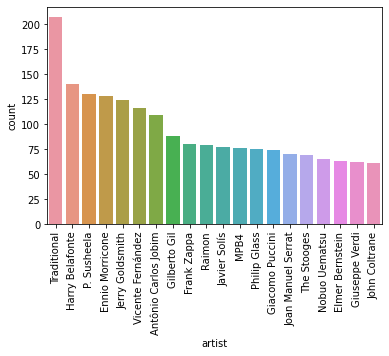

In [9]:
cx = sns.countplot(x="artist", data=spotify_data_newind, order=spotify_data_newind.artist.value_counts().iloc[:20].index)

plt.xticks(rotation=90)

plt.show()


In [10]:
spotify_data_newind['artist'].value_counts().iloc[:100]

Traditional        207
Harry Belafonte    140
P. Susheela        130
Ennio Morricone    128
Jerry Goldsmith    124
                  ... 
Bobby Vinton        33
Leno e Lilian       33
Rascal Flatts       33
Miles Davis         32
Éric Serra          32
Name: artist, Length: 100, dtype: int64

In [11]:
spotify_data_newind['artist'].value_counts().iloc[:500]

Traditional        207
Harry Belafonte    140
P. Susheela        130
Ennio Morricone    128
Jerry Goldsmith    124
                  ... 
Steve Hackett       15
Hans Zimmer         15
Mac Davis           15
Brian Hyland        15
David Grisman       15
Name: artist, Length: 500, dtype: int64

While there are multiple tracks assigned to a single artist, there remains huge variation in the artist names as well as some creative spellings for these names.  As such, it is impractical to graph the full artist split.  The above graph shows only the top 20 artists to see which artist are the most represented in the sample.  

We've added a look at the top 100 and top 500 to see some samples of how the frequencies change throughout the sample.  This shows that it's best to set aside the artist category for consideration at this time.

  ### 3.4.2 Total Tracks Per Genre and Decade<a id='3.4.2_Total_tracks_per_genre_and_decade'></a>

As music tastes and trends tend to change over time, it would be useful to see if there are noticible trends in genre selections over time.  This may indicate that not only track features, but the passage of time may impact categorizing songs into genres.

In [12]:
frequency = spotify_data_newind.groupby(["genre", "decade"]).size()
print (frequency)

genre  decade
edm    00s        245
       10s        276
       60s        256
       70s        254
       80s        239
       90s        245
latin  00s        734
       10s        705
       60s        227
       70s        332
       80s        488
       90s        384
pop    00s       1372
       10s       2333
       60s       5425
       70s       3712
       80s       2174
       90s       1444
r&b    00s       1921
       10s       1403
       60s        598
       70s       1946
       80s       2910
       90s       2262
rap    00s        585
       10s        733
       60s        275
       70s        242
       80s        163
       90s        366
rock   00s       1014
       10s        946
       60s       1861
       70s       1278
       80s        933
       90s        818
dtype: int64


We'll graph the data in two different ways so that we can see how trends change over time within the sample and within the genre itself.

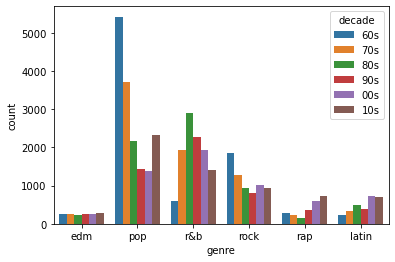

In [13]:
bx = sns.countplot(x="genre", hue="decade", data=spotify_data_newind)

The genre with the most tracks included is pop with more tracks in the 60's and 70's with a significant population in all decades.  EDM, rap & latin genres have a relatively small population in comparison.  R&B shows a clear pattern in increasing then decreasing population with the most tracks in the 1980's.  The opposite pattern is seen in the rock genre with 

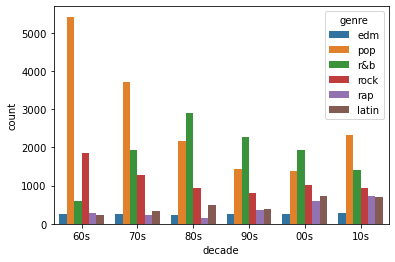

In [14]:
cx = sns.countplot(x="decade", hue="genre", data=spotify_data_newind)

Over time, a few genres show to shift their importance over time.  The two most obvious being pop and R&B.  In the 60's the count 

### 3.4.3 Averages by Genre<a id='3.4.3_Averages_by_Genre'></a>

#### 3.4.3.1 Average Dancibility by Genre<a id='3.4.3.1_Average_danceability_by_genre'></a>

In [29]:
avg_dancibility = spotify_data.groupby('genre')['danceability'].mean()
avg_dancibility.head(10)

genre
edm      0.494884
latin    0.572840
pop      0.595708
r&b      0.604391
rap      0.650625
rock     0.258498
Name: danceability, dtype: float64

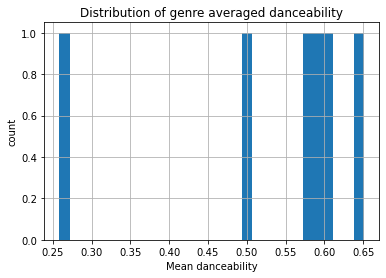

In [30]:
avg_dancibility.hist(bins=30)
plt.title('Distribution of genre averaged danceability')
plt.xlabel('Mean danceability')
plt.ylabel('count');

Songs belonging to the rock genre tend to average much lower on the dancibility scale than the rest of the genres.  This may explain the initial PCA showing so many outliers for songs in the rock genre.

#### 3.4.3.2 Average Energy by Genre<a id='3.4.3.2_Average_energy_by_genre'></a>

In [31]:
avg_energy = spotify_data.groupby('genre')['energy'].mean()
avg_energy.head(10)

genre
edm      0.623390
latin    0.914565
pop      0.525077
r&b      0.618209
rap      0.639897
rock     0.477217
Name: energy, dtype: float64

Songs belonging to the Latin music category appear to be  significantly higher in the energy feature as compared to the rest of the genre categories.  This may be helpful to consider when looking at potential decision tree algorithms.

#### 3.4.3.3 Average Loudness by Genre<a id='3.4.3.3_Average_loudness_by_genre'></a>

In [32]:
avg_loudness = spotify_data.groupby('genre')['loudness'].mean()
avg_loudness.head(10)

genre
edm      -9.096207
latin    -5.450051
pop     -10.444989
r&b      -9.748605
rap      -8.925788
rock    -13.141479
Name: loudness, dtype: float64

#### 3.4.3.4 Average Speechiness by Genre<a id='3.4.3.4_Average_speechiness_by_genre'></a>

In [33]:
avg_speechiness = spotify_data.groupby('genre')['speechiness'].mean()
avg_speechiness.head(10)

genre
edm      0.072475
latin    0.070059
pop      0.051503
r&b      0.055777
rap      0.353405
rock     0.056705
Name: speechiness, dtype: float64

Songs belonging to the rap genre appear to be significantly more speechier than songs belonging to other genre categories.  This would be uesful when considering a decision tree type of model.

### 3.4.4 Feature Engineering<a id='3.4.4 _Feature_Engineering'></a>

#### 3.4.4.1 Data Set Review for Feature Engineering<a id='3.4.4.1_Data_Set_Review_for_Feature_engineering'></a>

In [34]:
spotify_data.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b


#### 3.4.4.2 Feature correlation heatmap<a id='3.4.4.2_Feature_correlation_heatmap'></a>

Visualized high level view of relationships amongst the features.

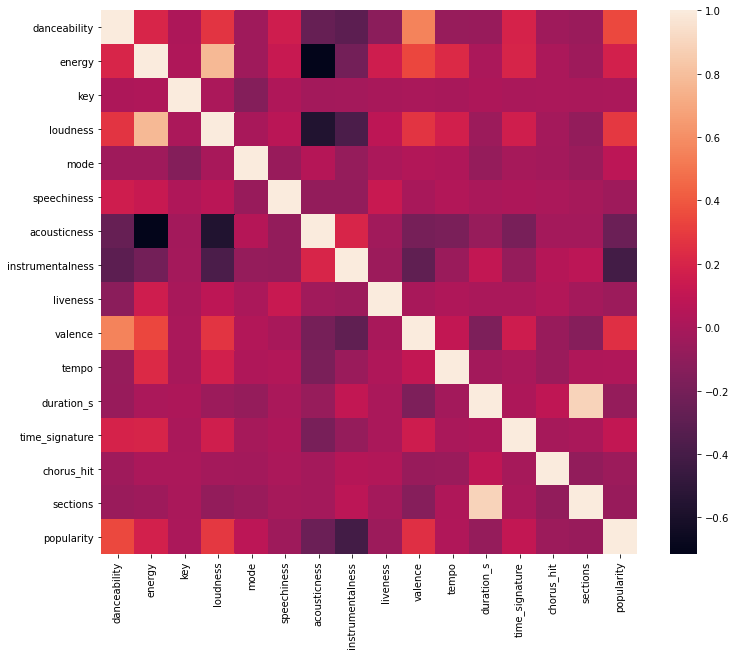

In [35]:
plt.subplots(figsize=(12,10))
sns.heatmap(spotify_data.corr());

Classify each correlation coefficient for pairs of features.

In [88]:
#stack the matrix
spotify_data_corr=spotify_data.corr(method ='pearson') 
spotify_data_corr1 = spotify_data_corr.stack().reset_index()

#set column names
spotify_data_corr1.columns = ['variable_1','variable_2','correlation_coefficient']

# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (spotify_data_corr1[['variable_1', 'variable_2']].apply(frozenset, axis=1).duplicated()) | (spotify_data_corr1['variable_1']==spotify_data_corr1['variable_2']) 

# apply the mask to clean the correlation dataframe
spotify_data_corr1 = spotify_data_corr1[~mask_dups]

# create a list of our conditions for correlation_class
conditions = [
    (spotify_data_corr1['correlation_coefficient'] > 0.6),
    (spotify_data_corr1['correlation_coefficient'] <= 0.6) & (spotify_data_corr1['correlation_coefficient'] > 0.4),
    (spotify_data_corr1['correlation_coefficient'] <= 0.4)
    ]

# create a list of the values we want to assign for each condition
values = ['HIGH', 'MID', 'LOW']

# create a new column and use np.select to assign values to it using our lists as arguments
spotify_data_corr1['correlation_class'] = np.select(conditions, values)

# display updated DataFrame
spotify_data_corr1.head()

,variable_1,variable_2,correlation_coefficient,correlation_class
1,danceability,energy,0.206036,LOW
2,danceability,key,0.015433,LOW
3,danceability,loudness,0.273997,LOW
4,danceability,mode,-0.032740,LOW
5,danceability,speechiness,0.156362,LOW


Save correlation classifications to csv for later use.

In [89]:
spotify_data_corr1.to_csv('./spotify_correlation_data.csv')

#### 3.4.4.3 Scatterplots of numeric features against genre <a id='3.4.4.3_Scatterplots_of_numeric_features_against_genre'></a>

##### Danceability

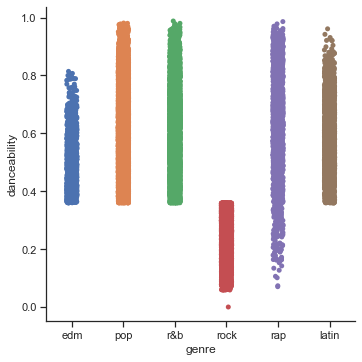

In [93]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['danceability'], data=spotify_data)

##### Energy

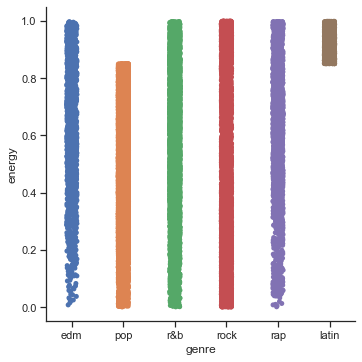

In [94]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['energy'], data=spotify_data)

##### Acousticness

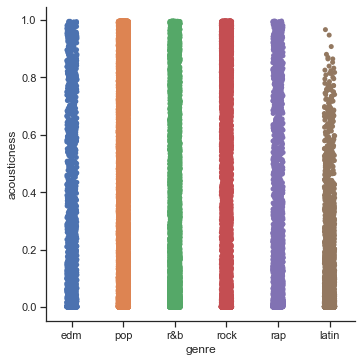

In [95]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['acousticness'], data=spotify_data)

##### Chorus Hit

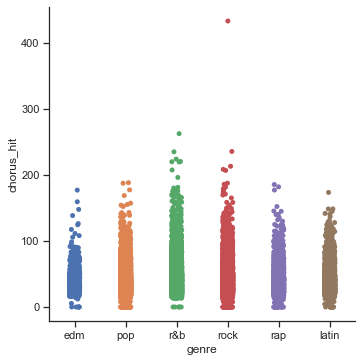

In [96]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['chorus_hit'], data=spotify_data)

##### Duration

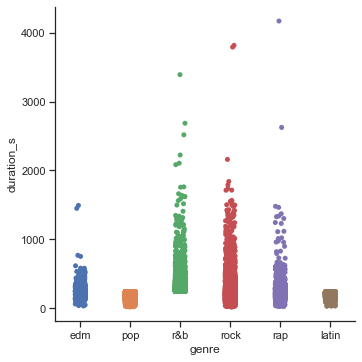

In [97]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['duration_s'], data=spotify_data)

##### Instrumentalness

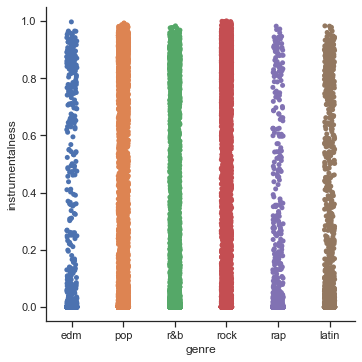

In [98]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['instrumentalness'], data=spotify_data)

##### Key

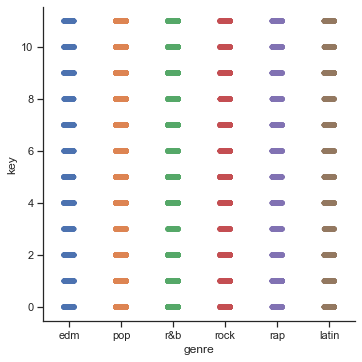

In [99]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['key'], data=spotify_data)

##### Liveness

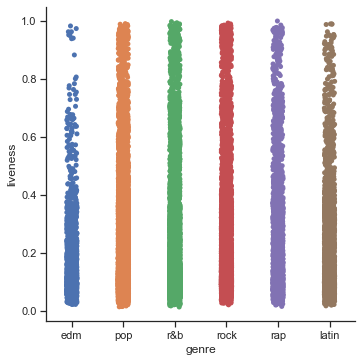

In [100]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['liveness'], data=spotify_data)

##### Loudness

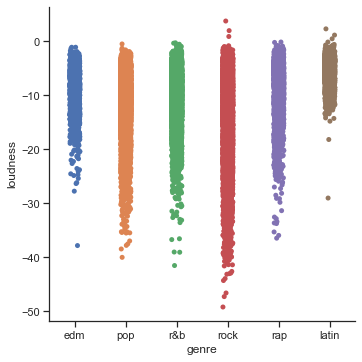

In [101]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['loudness'], data=spotify_data)

##### Mode

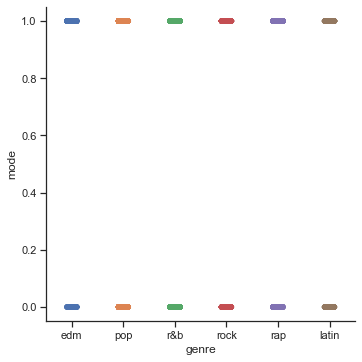

In [102]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['mode'], data=spotify_data)

##### Sections

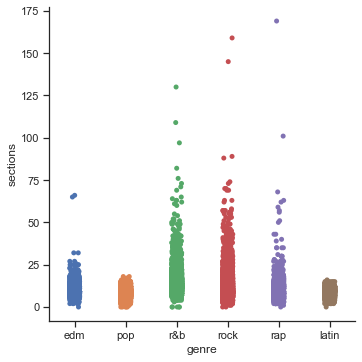

In [103]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['sections'], data=spotify_data)

##### Speechiness

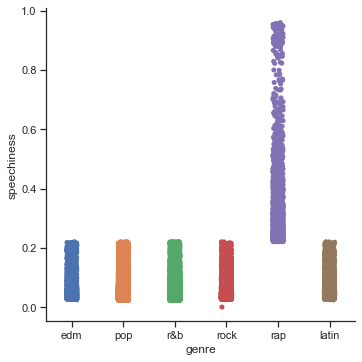

In [104]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['speechiness'], data=spotify_data)

##### Tempo

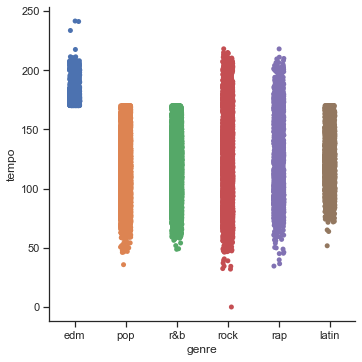

In [105]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['tempo'], data=spotify_data)

##### Time Signature

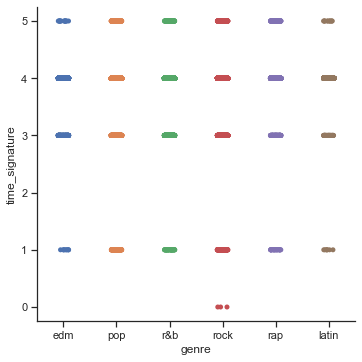

In [106]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['time_signature'], data=spotify_data)

##### Valence

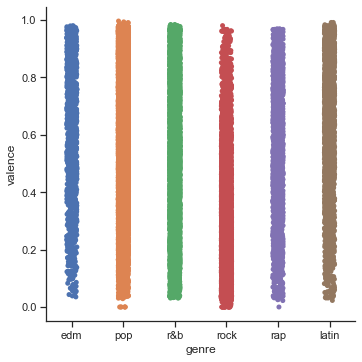

In [107]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x = spotify_data['genre'], y = spotify_data['valence'], data=spotify_data)

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong correlation with `speechiness` to rap. Features `energy`,`dancibility`,`tempo` seem very useful.

## 3.5 Summary<a id='3.5_Summary'></a>

Looking in depth at the various features of the data in EDA, we get better insight into how to approach our modeling. Correation has been seen in many areas but the primary features to focus on would be speechiness, energy, dancibility, and tempo.  Since a few features seem to be specific to certain genres, this suggests that a decision tree model of some kind is likely to be the most useful for this analysis.


In [39]:
# Save the data 
spotify_data.to_csv('./spotify_eda_data.csv')
